4/4 [==============================] - 0s 2ms/step
Epoch: 0, Discriminator Loss: 0.7087299227714539, Generator Loss: 0.6509860157966614, Discriminator Accuracy: 46.666666865348816%
4/4 [==============================] - 0s 2ms/step
Epoch: 100, Discriminator Loss: 0.9394683241844177, Generator Loss: 0.3841370940208435, Discriminator Accuracy: 47.14285731315613%
4/4 [==============================] - 0s 2ms/step


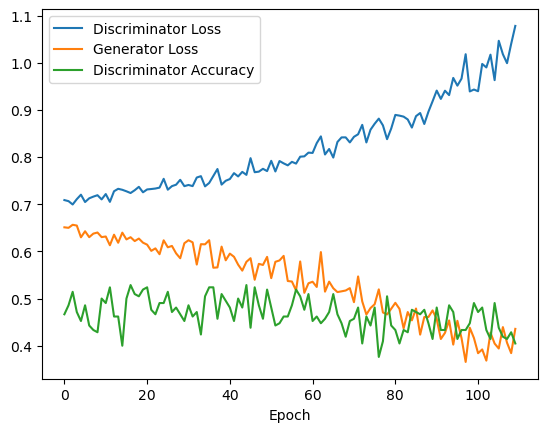

In [3]:
#Construct basic schema of Adversarial Neural Network
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define lists to store the losses and accuracies
d_losses = []
g_losses = []
d_accs = []

# Load the CSV dataset
data = pd.read_csv('input_data.csv')
x_train = data.iloc[:, 1:-1].values  # Extract all features except the first (index) and the last (label) columns
y_train = data.iloc[:, -1].values    # Extract the last (label) column

# Generator model
def create_generator(noise_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=noise_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(x_train.shape[1], activation='linear'),
    ])
    return model


# Discriminator model
def create_discriminator(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim),
        Dropout(0.25),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid'),
    ])
    return model


# Combine the Generator and Discriminator to create the Adversarial Neural Network
def create_gan_network(generator, discriminator):
    noise_dim = generator.layers[0].input_shape[-1]
    input_noise = Input(shape=(noise_dim,))
    img = generator(input_noise)
    discriminator.trainable = False
    validity = discriminator(img)
    gan = Model(input_noise, validity)
    return gan


# Define hyperparameters
noise_dim = 100
epochs = 110
batch_size = 105

# Create the models
generator = create_generator(noise_dim)
discriminator = create_discriminator(x_train.shape[1])
gan = create_gan_network(generator, discriminator)

# Compile the models
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')


# Train the Adversarial Neural Network
for epoch in range(epochs):
    random_noise = np.random.normal(0, 1, [batch_size, noise_dim])
    generated_data = generator.predict(random_noise)

    real_data = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

    X = np.concatenate((real_data, generated_data))
    y = np.zeros(batch_size * 2)
    y[:batch_size] = 1  # Real data

    # Train the Discriminator
    discriminator.trainable = True
    d_loss, d_acc = discriminator.train_on_batch(X, y)

    # Train the Generator by training the GAN (with fixed discriminator)
    random_noise = np.random.normal(0, 1, [batch_size, noise_dim])
    y = np.ones(batch_size)  # Fake data with label 1 (as if they were real)
    discriminator.trainable = False  # Fix the discriminator's weights before training the GAN
    g_loss = gan.train_on_batch(random_noise, y)
    
    # Append the losses and accuracies to the corresponding lists
    d_losses.append(d_loss)
    g_losses.append(g_loss)
    d_accs.append(d_acc)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}, Discriminator Accuracy: {100 * d_acc}%")

# Plot the losses and accuracies
plt.plot(range(epochs), d_losses, label='Discriminator Loss')
plt.plot(range(epochs), g_losses, label='Generator Loss')
plt.plot(range(epochs), d_accs, label='Discriminator Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.show()

4/4 [==============================] - 1s 4ms/step
Epoch: 0, Discriminator Loss: 2.5598361492156982, Generator Loss: 0.7864038944244385, Discriminator Accuracy: 50.0%
4/4 [==============================] - 0s 2ms/step
Epoch: 100, Discriminator Loss: 2.61311674118042, Generator Loss: 0.7160193920135498, Discriminator Accuracy: 50.0%
4/4 [==============================] - 0s 2ms/step


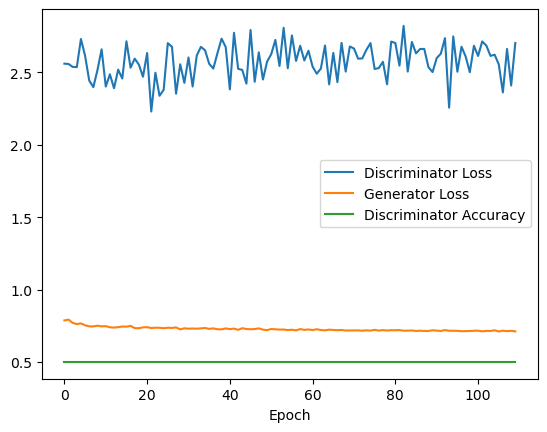

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define lists to store the losses and accuracies
d_losses = []
g_losses = []
d_accs = []

# Load the CSV dataset
data = pd.read_csv('D:\mainline\LPPLS\lppls-enhanced\lppls\data\LGO5YR.csv')
x_train = data['Adj Close'].values.reshape(-1, 1)

# Generator model
def create_generator(noise_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=noise_dim),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(x_train.shape[1], activation='linear'),
    ])
    return model


# Discriminator model
def create_discriminator(input_dim):
    model = Sequential([
        Dense(32, activation='relu', input_dim=input_dim),
        Dropout(0.25),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid'),
    ])
    return model


# Combine the Generator and Discriminator to create the Adversarial Neural Network
def create_gan_network(generator, discriminator):
    noise_dim = generator.layers[0].input_shape[-1]
    input_noise = Input(shape=(noise_dim,))
    img = generator(input_noise)
    discriminator.trainable = False
    validity = discriminator(img)
    gan = Model(input_noise, validity)
    return gan


# Define hyperparameters
noise_dim = 100
epochs = 110
batch_size = 105

# Create the models
generator = create_generator(noise_dim)
discriminator = create_discriminator(x_train.shape[1])
gan = create_gan_network(generator, discriminator)

# Compile the models
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')


# Train the Adversarial Neural Network
for epoch in range(epochs):
    random_noise = np.random.normal(0, 1, [batch_size, noise_dim])
    generated_data = generator.predict(random_noise)

    real_data = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

    X = np.concatenate((real_data, generated_data))
    y = np.zeros(batch_size * 2)
    y[:batch_size] = 1  # Real data

    # Train the Discriminator
    discriminator.trainable = True
    d_loss, d_acc = discriminator.train_on_batch(X, y)

    # Train the Generator by training the GAN (with fixed discriminator)
    random_noise = np.random.normal(0, 1, [batch_size, noise_dim])
    y = np.ones(batch_size)  # Fake data with label 1 (as if they were real)
    discriminator.trainable = False  # Fix the discriminator's weights before training the GAN
    g_loss = gan.train_on_batch(random_noise, y)
    
    # Append the losses and accuracies to the corresponding lists
    d_losses.append(d_loss)
    g_losses.append(g_loss)
    d_accs.append(d_acc)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}, Discriminator Accuracy: {100 * d_acc}%")

# Plot the losses and accuracies
plt.plot(range(epochs), d_losses, label='Discriminator Loss')
plt.plot(range(epochs), g_losses, label='Generator Loss')
plt.plot(range(epochs), d_accs, label='Discriminator Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.show()



4/4 [==============================] - 0s 1ms/step


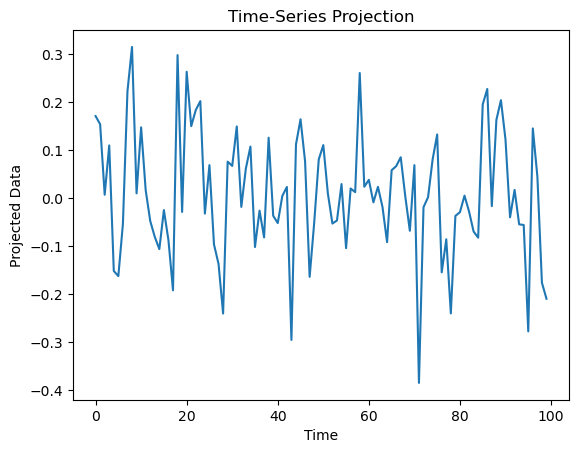

In [3]:
#Make projection, RAW
import numpy as np
import matplotlib.pyplot as plt

def plot_time_series_projection(generator, noise_dim, n_samples=100):
    # Generate random noise as input for the generator
    random_noise = np.random.normal(0, 1, [n_samples, noise_dim])

    # Generate synthetic data using the generator
    generated_data = generator.predict(random_noise)

    # Extract the relevant column (e.g., Adj Close) from the generated data
    projected_data = generated_data[:, 0]

    # Create the time axis
    time_axis = np.arange(n_samples)

    # Plot the projected time-series
    plt.plot(time_axis, projected_data)
    plt.xlabel('Time')
    plt.ylabel('Projected Data')
    plt.title('Time-Series Projection')
    plt.show()
plot_time_series_projection(generator, noise_dim, n_samples=100)

4/4 [==============================] - 0s 1ms/step


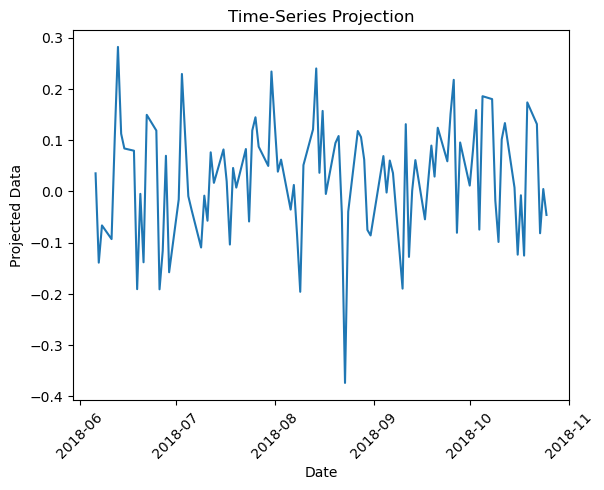

In [4]:
#Make Projection, User Friendly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_series_projection(generator, noise_dim, data_path, n_samples=100):
    # Load the CSV dataset
    data = pd.read_csv(data_path)
    dates = pd.to_datetime(data['Date'])  # Extract the 'Date' column as datetime

    # Generate random noise as input for the generator
    random_noise = np.random.normal(0, 1, [n_samples, noise_dim])

    # Generate synthetic data using the generator
    generated_data = generator.predict(random_noise)

    # Extract the relevant column (e.g., Adj Close) from the generated data
    projected_data = generated_data[:, 0]

    # Create the time axis
    time_axis = dates[:n_samples]  # Use the first n_samples dates

    # Plot the projected time-series
    plt.plot(time_axis, projected_data)
    plt.xlabel('Date')
    plt.ylabel('Projected Data')
    plt.title('Time-Series Projection')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()
plot_time_series_projection(generator, noise_dim, 'D:\mainline\LPPLS\lppls-enhanced\lppls\data\LGO5YR.csv', n_samples=100)

40/40 [==============================] - 0s 1ms/step


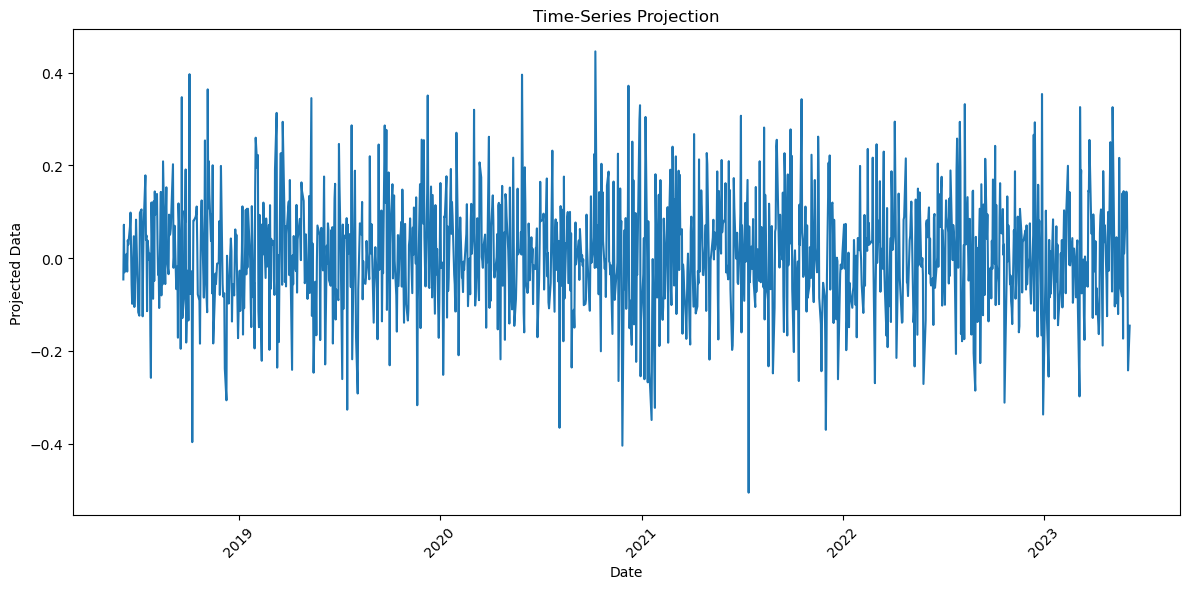

In [6]:
#Make Projection, User Friendly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_series_projection(generator, noise_dim, data_path, n_samples=100):
    # Load the CSV dataset
    data = pd.read_csv(data_path)
    dates = pd.to_datetime(data['Date'])  # Extract the 'Date' column as datetime

    # Generate random noise as input for the generator
    random_noise = np.random.normal(0, 1, [len(dates), noise_dim])

    # Generate synthetic data using the generator
    generated_data = generator.predict(random_noise)

    # Extract the relevant column (e.g., Adj Close) from the generated data
    projected_data = generated_data[:, 0]

    # Set the figure size to adjust the plot dimensions
    plt.figure(figsize=(12, 6))

    # Plot the projected time-series
    plt.plot(dates[:len(projected_data)], projected_data)
    plt.xlabel('Date')
    plt.ylabel('Projected Data')
    plt.title('Time-Series Projection')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

plot_time_series_projection(generator, noise_dim, 'D:\mainline\LPPLS\lppls-enhanced\lppls\data\LGO5YR.csv', n_samples=100)

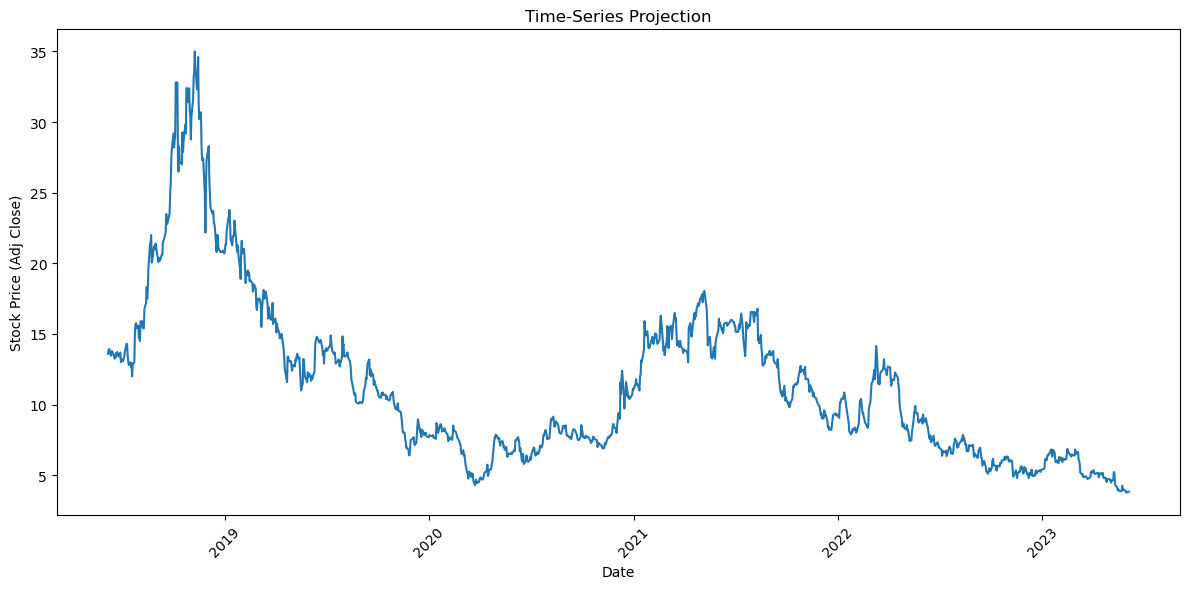

In [7]:
#Refine User Friendliness of Projection
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_series_projection(generator, noise_dim, data_path, n_samples=100):
    # Load the CSV dataset
    data = pd.read_csv(data_path)
    dates = pd.to_datetime(data['Date'])  # Extract the 'Date' column as datetime
    actual_data = data['Adj Close']  # Extract the 'Adj Close' column as actual data

    # Set the figure size to adjust the plot dimensions
    plt.figure(figsize=(12, 6))

    # Plot the actual stock prices as the time-series
    plt.plot(dates, actual_data)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (Adj Close)')
    plt.title('Time-Series Projection')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
plot_time_series_projection(generator, noise_dim, 'D:\mainline\LPPLS\lppls-enhanced\lppls\data\LGO5YR.csv', n_samples=100)

19/19 [==============================] - 0s 2ms/step


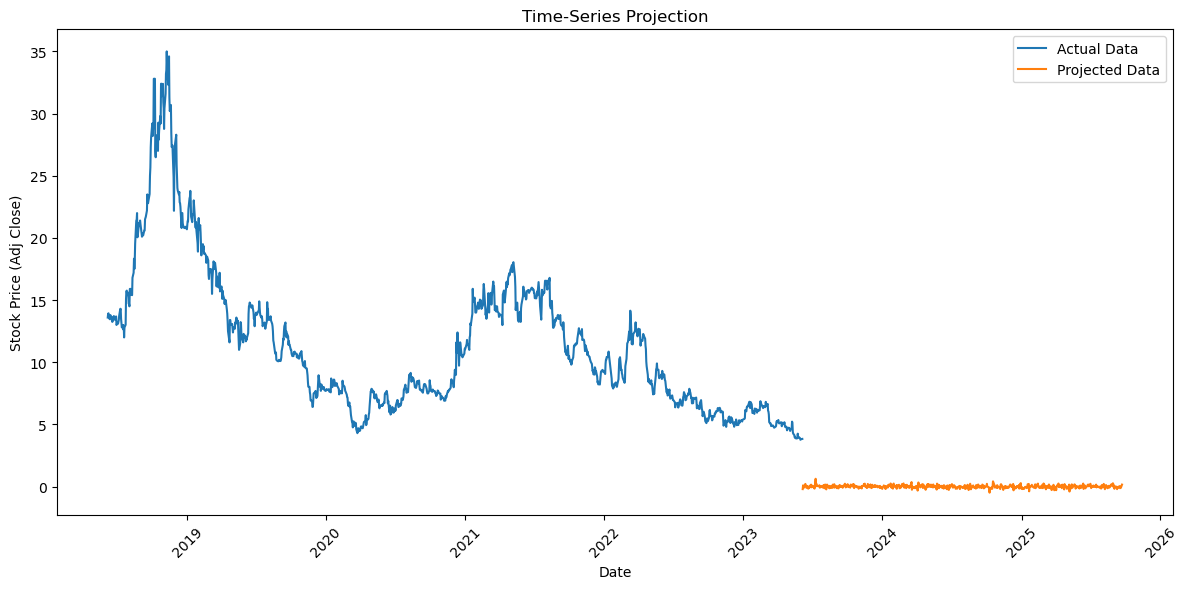

In [9]:
#Make 6 month projection, refine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_time_series_projection(generator, noise_dim, data_path, n_samples=100, projection_months=6):
    # Load the CSV dataset
    data = pd.read_csv(data_path)
    dates = pd.to_datetime(data['Date'])  # Extract the 'Date' column as datetime
    actual_data = data['Adj Close']  # Extract the 'Adj Close' column as actual data

    # Set the figure size to adjust the plot dimensions
    plt.figure(figsize=(12, 6))

    # Plot the actual stock prices as the time-series
    plt.plot(dates, actual_data, label='Actual Data')

    # Generate noise for projection
    noise = np.random.normal(0, 1, (n_samples * projection_months, noise_dim))

    # Generate projected data
    projected_data = generator.predict(noise)

    # Generate dates for projected data
    last_date = dates.iloc[-1]
    projected_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n_samples * projection_months, freq='B')

    # Plot the projected data
    plt.plot(projected_dates, projected_data.flatten(), label='Projected Data')

    plt.xlabel('Date')
    plt.ylabel('Stock Price (Adj Close)')
    plt.title('Time-Series Projection')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

plot_time_series_projection(generator, noise_dim, 'D:\mainline\LPPLS\lppls-enhanced\lppls\data\LGO5YR.csv', n_samples=100, projection_months=6)